In [1]:
import ipynbname

title = ipynbname.name().replace('_', ' ')
from benchmark import benchmark, method_constructor, latex_table, violin_plot

In [2]:
bm = benchmark(
    'BHPERI',
    'GMTKN55_BHPERI',
    method_constructor(['HF', 'MP2', 'MP3', 'MP4', 'CCSD', 'PAPT2', 'PAPT3', 'PAPT4', 'CCSD(T)'], counterpoise=False),
    ['cc-pVDZ', 'cc-pVTZ'],
    max_electrons=100,
    open_shell=False,
    # verbose=True,
    reference='CCSD(T)',
    parallel=6,
    # check=True,
)

In [3]:
for k in ['reaction energy deviations', 'reaction energies', 'reaction statistics']:
    lt = latex_table(bm[k], title + ': ' + k, 'CCSD(T)')
    # print(lt)
    with open((title + ' ' + k + '.tex').replace(' ', '_'), 'w') as f:
        f.write(lt)
    print(bm[k])


       HF    MP2   MP3    MP4  CCSD  PAPT2  PAPT3  PAPT4
1   41.72  -3.43 12.46  -3.35 13.95  12.69  13.03   0.07
2   69.25 -26.59 10.83 -11.11 17.29  11.66  12.36  -1.43
3   56.96 -27.11 13.41 -11.89 16.69  11.86  12.17   0.07
4   80.92 -25.91 10.43 -10.05 18.31  12.12  12.83  -1.91
5   30.83 -21.18  4.12  -7.21  7.58   4.77   5.05  -0.75
6  100.43 -39.84 18.24 -15.71 25.78  18.94  19.98  -1.97
7  110.71 -37.77 13.21 -14.37 24.55  17.11  18.42  -2.26
8  107.90 -42.29 17.29 -16.68 23.87  18.66  19.52  -1.59
9  128.56 -52.87 26.66 -23.47 30.55  24.54  25.30  -1.31
10  69.08 -31.27 26.58 -18.15 26.12  21.83  22.55  -0.12
11 108.83 -14.96 27.50 -12.68 26.84  25.00  25.53   2.47
12 103.70 -25.94 23.09 -15.56 25.09  20.28  20.77   0.25
13  97.45 -36.54 13.04 -15.44 21.76  11.10  11.82  -4.25
14 104.99 -22.34 27.60 -19.83 25.85  23.74  24.12   0.70
15  81.97 -33.63 12.72 -16.17 18.52  10.75  11.38  -2.34
16  85.65 -34.47  9.44 -15.28 18.53  10.44  11.45  -3.05
17  87.19 -25.01 13.63 -11.56 1

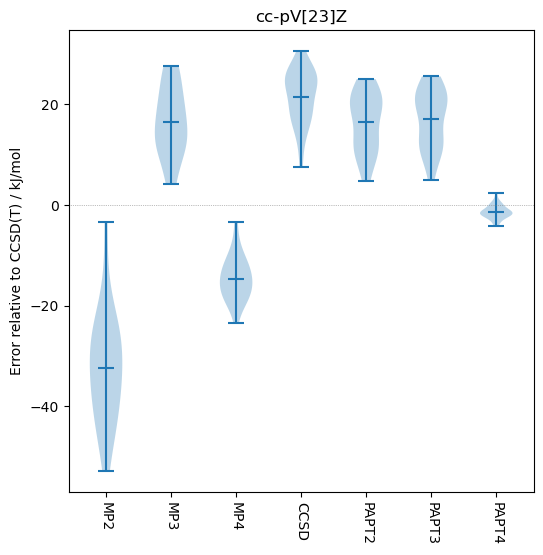

In [4]:
fig = violin_plot(bm)
fig.savefig((title + ' reaction energy deviations.pdf').replace(' ', '_'), transparent=True,bbox_inches='tight',pad_inches=0)
fig

In [5]:
len(bm['reaction energies'])

26

In [7]:
import shutil
from benchmark import unused_project_directories
for d in unused_project_directories(bm):
    shutil.rmtree(d)

In [8]:
from git import Repo
from benchmark import all_project_directories
repo = Repo('.')
repo.git.add(all_project_directories(bm))

''